<h1 style="background-color:orange;">Fashion_mnist Dataset and also CNN vs ANN</h1>

In [13]:
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 9s 2us/step


In [5]:
print("x_train Shape : ",x_train.shape)
print("x_test Shape : ",x_test.shape)
print("y_train Shape : ",y_train.shape)
print("y_train Shape : ",y_test.shape)

x_train Shape :  (60000, 28, 28)
x_test Shape :  (10000, 28, 28)
y_train Shape :  (60000,)
y_train Shape :  (10000,)


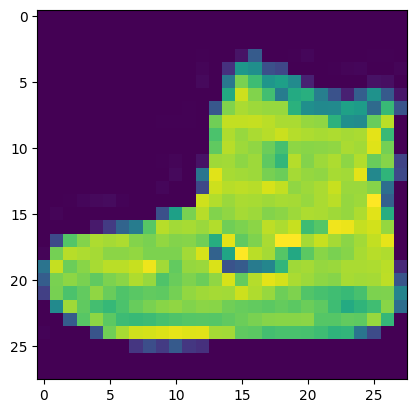

In [9]:
plt.imshow(x_train[0])

In [10]:
y_train[0]

9

In [16]:
y_train[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [17]:
classes = ["T-Shirt","Trouser","Pullover","Dress","Coat","Sandle","Shirt","Sneaker","Bag","Ankle Boot"]
def sample_plot(x,y,index):
    plt.figure(figsize=(2,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    plt.show()

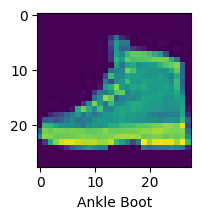

In [24]:
sample_plot(x_train,y_train,434)

In [25]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

<h1 style="background-color:orange;">Scaling x_train and x_test</h1>

In [28]:
x_train = x_train/255
x_test = x_test/255

In [29]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<h1 style="background-color:orange;">ANN</h1>

In [34]:
model = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='softmax'),
])
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

In [36]:
model.fit(x_train,y_train,epochs=6,batch_size=100)

Epoch 1/6
600/600 [==============================] - 62s 102ms/step - loss: 0.5675 - accuracy: 0.8147
Epoch 2/6
600/600 [==============================] - 59s 98ms/step - loss: 0.4967 - accuracy: 0.8327
Epoch 3/6
600/600 [==============================] - 60s 100ms/step - loss: 0.4627 - accuracy: 0.8410
Epoch 4/6
600/600 [==============================] - 60s 100ms/step - loss: 0.4396 - accuracy: 0.8494
Epoch 5/6
600/600 [==============================] - 60s 101ms/step - loss: 0.4231 - accuracy: 0.8540
Epoch 6/6
600/600 [==============================] - 60s 100ms/step - loss: 0.4112 - accuracy: 0.8578


<h1 style="background-color:orange;">Accuracy of ANN : 84%</h1>

In [37]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.4376 - accuracy: 0.8467


[0.437556654214859, 0.8467000126838684]

<h1 style="background-color:orange;">CNN</h1>

In [42]:
cnn = models.Sequential([
    layers.Conv2D(filters=40,kernel_size=(3,3),activation="relu",input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=80,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10,activation="softmax")
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(x_train,y_train,epochs=6,batch_size=100)

Epoch 1/6
600/600 [==============================] - 69s 111ms/step - loss: 0.5239 - accuracy: 0.8106
Epoch 2/6
600/600 [==============================] - 67s 111ms/step - loss: 0.3369 - accuracy: 0.8792
Epoch 3/6
600/600 [==============================] - 67s 112ms/step - loss: 0.2907 - accuracy: 0.8949
Epoch 4/6
600/600 [==============================] - 69s 115ms/step - loss: 0.2642 - accuracy: 0.9037
Epoch 5/6
600/600 [==============================] - 67s 112ms/step - loss: 0.2385 - accuracy: 0.9125
Epoch 6/6
600/600 [==============================] - 260s 433ms/step - loss: 0.2182 - accuracy: 0.9205


<h1 style="background-color:orange;">Accuracy of CNN : 90%</h1>

In [44]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 6s 17ms/step - loss: 0.2538 - accuracy: 0.9079


[0.2538132667541504, 0.9078999757766724]

In [45]:
y_pred = cnn.predict(x_test)

313/313 [==============================] - 5s 13ms/step


In [46]:
y_pred[0]

array([3.99578738e-07, 1.16641796e-09, 4.62436596e-08, 1.63922280e-08,
       3.14149307e-09, 6.94148068e-04, 1.37025165e-08, 1.83885056e-03,
       4.09704353e-06, 9.97462511e-01], dtype=float32)

In [47]:
np.argmax(y_pred[0])

9

<h1 style="background-color:orange;">Testing</h1>

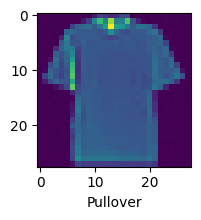

In [68]:
sample_plot(x_test,y_test,3553)

In [51]:
y_predict = [np.argmax(element) for element in y_pred]

In [67]:
y_predict_classes = classes[y_predict[3553]]
y_predict_classes

'T-Shirt'

In [52]:
y_predict[0]

9